In [1]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
from matplotlib import rc
import astropy.units as u
from astropy import constants as const
from scipy import interpolate
from scipy.ndimage.filters import gaussian_filter
from astropy.cosmology import FlatLambdaCDM

cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

rc('font',**{'size':16})
rc('figure', figsize=(12.0, 6.0))
rc('figure', dpi=300)

# Units
Msun = (const.G*u.Msun/const.c**3).si.value
Mpc = (u.Mpc/const.c).si.value
kpc = 1e-3*Mpc
pc = 1e-6*Mpc
yr = 3.154e7

/var/folders/wx/s6tdgfqx1pz781my7s5xrhtc0000gp/T/ipykernel_47295/1067720206.py:8: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


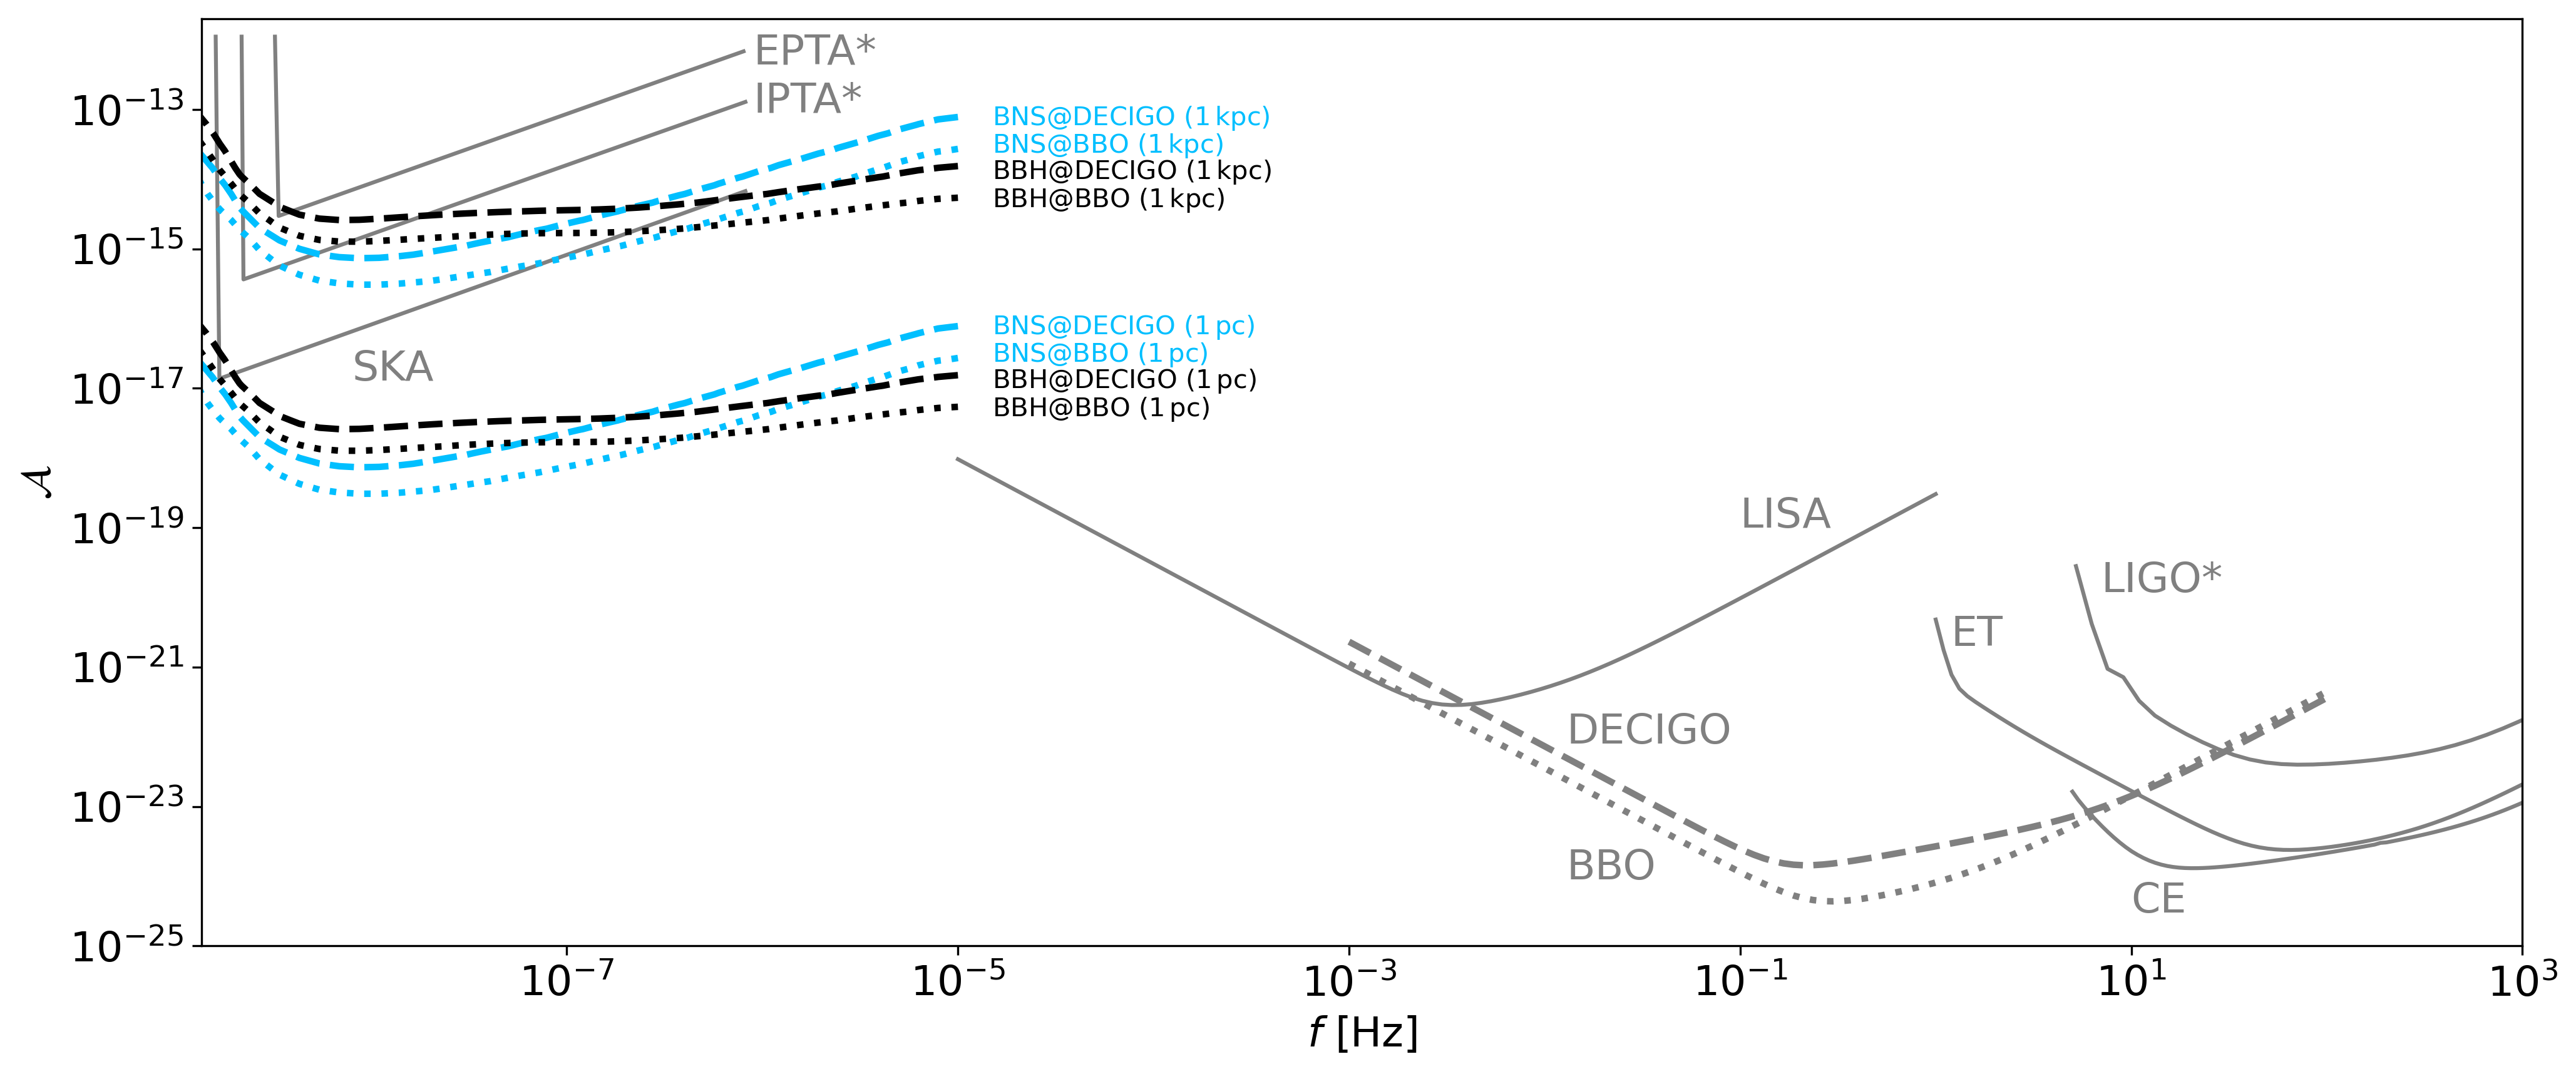

In [2]:
Amod, fmod, red, Delta_Amod, Delta_fmod = np.loadtxt('NS-Grids/BinaryTimingArrayGrid_PN_DECIGO.txt',unpack=True)
redval = np.unique(red)[4] #redshift

plt.figure(figsize=(14,6))
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$f$ [Hz]')
plt.ylabel(r'$\mathcal{A}$')
#plt.title(r'$z=$'+"%2.5f" % redval)
plt.ylim(1e-25,2e-12)
plt.xlim(1.36e-9,1e3)

neutral_color = 'grey'
DECIGO_color = 'C0'
BBO_color = 'C1'
lw1 = 2.5

# LIGO
x,y = np.loadtxt("Detector-Files/LIGO.txt",unpack=True) # https://dcc.ligo.org/LIGO-T1800044/public
LIGO = interpolate.interp1d(x,y**2,fill_value=np.inf,bounds_error=False)
f_array = np.geomspace(1e-3,1e5,100)
plt.loglog(f_array,(LIGO(f_array)*f_array)**.5,color=neutral_color)

# LISA
def LISA(f,f0=1e-3,S0=9.2e-44):
    x = f/f0
    return ((x/10)**(-4)+173+x**2)*S0
f_array = np.geomspace(1e-5,1e0,100)
plt.loglog(f_array,(LISA(f_array)*f_array)**.5,color=neutral_color)

# CE
x,y = np.loadtxt("Detector-Files/CE.txt",unpack=True) # https://cosmicexplorer.org/sensitivity.html
CE = interpolate.interp1d(x,y**2,fill_value=1e10,bounds_error=False)
f_array = np.geomspace(min(x),max(x),100)
plt.loglog(f_array,(CE(f_array)*f_array)**.5,color=neutral_color)

# ET
x,y = np.loadtxt("Detector-Files/ET.txt",unpack=True) # https://www.et-gw.eu/index.php/etsensitivities
ET = interpolate.interp1d(x,y**2,fill_value=1e10,bounds_error=False)
f_array = np.geomspace(min(x),max(x),100)
plt.loglog(f_array,(ET(f_array)*f_array)**.5,color=neutral_color)


# Pulsar Timing Arrays
f,strain = np.genfromtxt('Detector-Files/SKA.csv',delimiter=',',unpack=True)
plt.loglog(f,strain,color=neutral_color)
f,strain = np.genfromtxt('Detector-Files/EPTA.csv',delimiter=',',unpack=True)
plt.loglog(f,strain,color=neutral_color)
f,strain = np.genfromtxt('Detector-Files/IPTA.csv',delimiter=',',unpack=True)
plt.loglog(f,strain,color=neutral_color)

# DECIGO
def DECIGO(f,fp=7.36):
    return 7.05e-48*(1+(f/fp)**2)\
    +4.8e-51*f**(-4)/(1+(f/fp)**2)\
    +5.33e-52*f**(-4)
f_array = np.geomspace(1e-3,1e2,100)
plt.loglog(f_array,(DECIGO(f_array)*f_array)**.5,linewidth=lw1,linestyle="dashed",color=neutral_color)

# BBO
def BBO(f):
    return 2.0e-49*f**2\
    +4.58e-49\
    +1.26e-51*f**(-4)
f_array = np.geomspace(1e-3,1e2,100)
plt.loglog(f_array,(BBO(f_array)*f_array)**.5,linewidth=lw1,linestyle="dotted",color=neutral_color)

Amod, fmod, red, Delta_Amod, Delta_fmod = np.loadtxt('NS-Grids/BinaryTimingArrayGrid_PN_DECIGO.txt',unpack=True)

x = fmod[red==redval]
y = Amod[red==redval]
z = np.log10(Delta_Amod[red==redval]/Amod[red==redval])

xi = np.geomspace(min(x), max(x), 50)
yi = np.geomspace(min(y), max(y), 50)

# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

for distance in [1e-6,1e-3]: # in Mpc
    CS = plt.contour(xi, yi*distance/cosmo.luminosity_distance(redval).value, gaussian_filter(zi, sigma=2.), levels=[-.5], linewidths=lw1, colors="deepskyblue", linestyles="dashed")

Amod, fmod, red, Delta_Amod, Delta_fmod = np.loadtxt('NS-Grids/BinaryTimingArrayGrid_PN_BBO.txt',unpack=True)

x = fmod[red==redval]
y = Amod[red==redval]
z = np.log10(Delta_Amod[red==redval]/Amod[red==redval])

xi = np.geomspace(min(x), max(x), 50)
yi = np.geomspace(min(y), max(y), 50)

# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

for distance in [1e-6,1e-3]: # in Mpc
    CS = plt.contour(xi, yi*distance/cosmo.luminosity_distance(redval).value, gaussian_filter(zi, sigma=2.), levels=[-.5], linewidths=lw1, colors="deepskyblue", linestyles="dotted")

Amod, fmod, red, Delta_Amod, Delta_fmod = np.loadtxt('BH-Grids/BinaryTimingArrayGrid_PN_DECIGO.txt',unpack=True)

x = fmod[red==red]
y = Amod[red==red]
z = np.log10(Delta_Amod[red==red]/Amod[red==red])

xi = np.geomspace(min(x), max(x), 50)
yi = np.geomspace(min(y), max(y), 50)

# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

for distance in [1e-6,1e-3]: # in Mpc
    CS = plt.contour(xi, yi*distance/cosmo.luminosity_distance(redval).value, gaussian_filter(zi, sigma=2.), levels=[-.5], linewidths=lw1, colors="k", linestyles="dashed")

Amod, fmod, red, Delta_Amod, Delta_fmod = np.loadtxt('BH-Grids/BinaryTimingArrayGrid_PN_BBO.txt',unpack=True)

x = fmod[red==red]
y = Amod[red==red]
z = np.log10(Delta_Amod[red==red]/Amod[red==red])

xi = np.geomspace(min(x), max(x), 50)
yi = np.geomspace(min(y), max(y), 50)

# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

for distance in [1e-6,1e-3]: # in Mpc
    CS = plt.contour(xi, yi*distance/cosmo.luminosity_distance(redval).value, gaussian_filter(zi, sigma=2.), levels=[-.5], linewidths=lw1, colors="k", linestyles="dotted")

plt.text(7e0,1.2e-20,"LIGO*",c=neutral_color)
plt.text(1.2e0,2e-21,"ET",c=neutral_color)
plt.text(1e1,3.0e-25,"CE",c=neutral_color)
plt.text(1e-1,1e-19,"LISA",c=neutral_color)
plt.text(0.9e-6,4.5e-13,"EPTA*",c=neutral_color)
plt.text(0.9e-6,0.9e-13,"IPTA*",c=neutral_color)
plt.text(0.8e-8,1.3e-17,"SKA",c=neutral_color)
plt.text(1.3e-2,8e-23,"DECIGO",c=neutral_color)
plt.text(1.3e-2,9e-25,"BBO",c=neutral_color)

plt.text(1.5e-5,4*15e-15,r"BNS@DECIGO ($1\,\rm kpc$)",c="deepskyblue",fontsize=10)
plt.text(1.5e-5,4*6e-15,r"BNS@BBO ($1\,\rm kpc$)",c="deepskyblue",fontsize=10)
plt.text(1.5e-5,4*2.5e-15,r"BBH@DECIGO ($1\,\rm kpc$)",c="k",fontsize=10)
plt.text(1.5e-5,4*1e-15,r"BBH@BBO ($1\,\rm kpc$)",c="k",fontsize=10)

plt.text(1.5e-5,4*15e-18,r"BNS@DECIGO ($1\,\rm pc$)",c="deepskyblue",fontsize=10)
plt.text(1.5e-5,4*6e-18,r"BNS@BBO ($1\,\rm pc$)",c="deepskyblue",fontsize=10)
plt.text(1.5e-5,4*2.5e-18,r"BBH@DECIGO ($1\,\rm pc$)",c="k",fontsize=10)
plt.text(1.5e-5,4*1e-18,r"BBH@BBO ($1\,\rm pc$)",c="k",fontsize=10)

plt.tight_layout()
plt.show()